# Retail Lab (Advanced Data Transformation)

**Learning Objectives:**
  * Apply advanced data transformation techniques
  * Gain exposure to retail related DataSets

## Context of the datasets

### 1. There are three datasets: `articles.csv.zip`, `customers.csv.zip` and `transactions2020.csv.zip`

#### 2. The Articles dataset contains information over products available.
#### 3. The Customers dataset contains information over registered customers.
#### 4. The Transactions dataset contains purchases of articles made by customers.



## 1. Library Import

In [2]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [4]:
Articles=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/articles.csv.zip")

In [5]:
Articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [6]:
Articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [7]:
Customers=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/customers.csv.zip")

In [8]:
Customers.sample(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
498108,5d059fa29a8a25f06516c93273cdaf040415199f893d78...,NaN,NaN,ACTIVE,NONE,30.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
753956,8cbb1f34e0e75d3dde540804b586bc7d2c8edb39853ade...,NaN,NaN,ACTIVE,NONE,28.0,70f347acc0112ce0e615b1d5de8a478e8edc9a74656209...
849454,9e92ab291074604580b56aa3839f61466c422d84149dab...,NaN,NaN,ACTIVE,NONE,20.0,c1b41ce0716ff067ea24717135a8c94cec4db3eb3cc4f6...


In [9]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [25]:
Transactions=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/transactions2020.csv.zip",parse_dates=['t_dat'])

In [26]:
Transactions.sample(3)

,t_dat,customer_id,article_id,price,sales_channel_id
4189274,2020-08-27,ca459e834f082852e3dc8e9ba14d05641399f1150205ca...,805095007,0.022017,1
663947,2020-06-16,54744a5ac90b390ca1ba0c231040fb26c02486b2faf3a6...,825550003,0.042356,2
4414692,2020-09-02,b2e9c96c1916381cc1f214a01e4af561deb666cc564ba4...,748355003,0.021627,2


In [27]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151470 entries, 0 to 5151469
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 196.5+ MB


## 3. Merging DataFrames

#### 3.1. Transactions-Articles


In [13]:
Transactions.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2


In [14]:
Articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [15]:
## we merge both DataFrames using the common key: article_id. We store the result in a new DataFrame
TransactionsAndArticles=pd.merge(Transactions, Articles, how='left',on='article_id')

#### 3.2. Transactions-Articles-Customers

In [16]:
TransactionsAndArticles.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2,844198,Saturn trs (J),296,Pyjama bottom,Nightwear,...,Nightwear,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in sweatshirt fabric with wide ...
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1,777016,Cisco skirt,275,Skirt,Garment Lower body,...,Trousers & Skirt,A,Ladieswear,1,Ladieswear,18,Womens Trend,1009,Trousers,"Calf-length skirt in softly draping, patterned..."
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2,820507,Charlotte Hipster Primula,286,Underwear bottom,Underwear,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Hipster briefs in lace with a mid waist, lined..."


In [17]:
Customers.head(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [28]:
## we merge both DataFrames using the common key: customer_id. We store the result in a new DataFrame
TransactionsAndArticlesAndCustomers=pd.merge(TransactionsAndArticles, Customers, how='left',on='customer_id')

In [19]:
TransactionsAndArticlesAndCustomers.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2,844198,Saturn trs (J),296,Pyjama bottom,Nightwear,...,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in sweatshirt fabric with wide ...,NaN,NaN,ACTIVE,NONE,40.0,0c0e15f8fa88a1d4aa6ca8a0b4a8289ca1affbaebdea22...
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1,777016,Cisco skirt,275,Skirt,Garment Lower body,...,Womens Trend,1009,Trousers,"Calf-length skirt in softly draping, patterned...",1.0,1.0,ACTIVE,Regularly,59.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2,820507,Charlotte Hipster Primula,286,Underwear bottom,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear","Hipster briefs in lace with a mid waist, lined...",NaN,NaN,ACTIVE,NONE,23.0,8d4ceb946237cf52ce5c2a1a71d1221fde77627a52d661...


In [20]:
TransactionsAndArticlesAndCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151470 entries, 0 to 5151469
Data columns (total 35 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   t_dat                         object 
 1   customer_id                   object 
 2   article_id                    int64  
 3   price                         float64
 4   sales_channel_id              int64  
 5   product_code                  int64  
 6   prod_name                     object 
 7   product_type_no               int64  
 8   product_type_name             object 
 9   product_group_name            object 
 10  graphical_appearance_no       int64  
 11  graphical_appearance_name     object 
 12  colour_group_code             int64  
 13  colour_group_name             object 
 14  perceived_colour_value_id     int64  
 15  perceived_colour_value_name   object 
 16  perceived_colour_master_id    int64  
 17  perceived_colour_master_name  object 
 18  department_no         

In [36]:
# we cast t_dat as a dateTime object

TransactionsAndArticlesAndCustomers['t_dat'] = pd.to_datetime(TransactionsAndArticlesAndCustomers['t_dat'])

## 3. We need to develop a visual representation of the evolution of sales per department
### We decide to use heatmap plots: https://seaborn.pydata.org/generated/seaborn.heatmap.html
### Heatmap plots require the data in Wide Format

### 3.2 We compute the weekly sum of `price` per `department_name`

In [37]:
TransactionsAndArticlesAndCustomers[['department_name','t_dat','price']]

,department_name,t_dat,price
0,Nightwear,2020-06-01,0.016932
1,Trousers & Skirt,2020-06-01,0.030492
2,Expressive Lingerie,2020-06-01,0.010153
3,Jersey,2020-06-01,0.016932
4,Swimwear,2020-06-01,0.025407
...,...,...,...
5151465,Dresses,2020-09-22,0.059305
5151466,Dresses,2020-09-22,0.042356
5151467,Bags,2020-09-22,0.043203
5151468,Jewellery,2020-09-22,0.006763


In [41]:
TransactionsAndArticlesAndCustomersGrouped=TransactionsAndArticlesAndCustomers[['department_name','t_dat','price']].groupby(['department_name',pd.Grouper(key='t_dat',freq='7D')]).sum()
TransactionsAndArticlesAndCustomersGrouped.reset_index()

,department_name,t_dat,price
0,AK Bottoms,2020-06-01,5.003271
1,AK Bottoms,2020-06-08,3.692458
2,AK Bottoms,2020-06-15,12.843644
3,AK Bottoms,2020-06-22,9.507068
4,AK Bottoms,2020-06-29,7.671847
...,...,...,...
3787,Young boy Swimwear,2020-08-17,0.075831
3788,Young boy Swimwear,2020-08-24,0.052475
3789,Young boy Swimwear,2020-08-31,0.027085
3790,Young boy Swimwear,2020-09-07,0.015237


### 3.3. We pivot the DataFrame to transform it into wide format

In [47]:
TransactionsAndArticlesAndCustomersGrouped.reset_index().pivot(index='t_dat',columns='department_name',values='price')

department_name,AK Bottoms,AK Dresses & Outdoor,AK Other,AK Tops Jersey & Woven,AK Tops Knitwear,Accessories,Accessories Boys,Accessories Other,Asia Assortment,Baby Boy Jersey Fancy,...,Young Girl Jersey Basic,Young Girl Jersey Fancy,Young Girl Knitwear,Young Girl Outdoor,Young Girl S&T,Young Girl Shoes,Young Girl Swimwear,Young Girl Trouser,Young Girl UW/NW,Young boy Swimwear
t_dat,,,,,,,,,,,,,,,,,,,,,
2020-06-01,5.003271,4.113678,0.094864,0.298305,0.155864,3.291390,NaN,0.066051,2.044441,1.957237,...,1.962000,4.360576,0.311644,0.647864,0.278356,0.596254,1.885000,1.865627,1.286169,0.411373
2020-06-08,3.692458,4.318220,0.176966,0.514492,0.208661,2.034729,NaN,0.022017,2.611814,1.806559,...,1.328305,3.108492,0.399559,0.443068,0.147051,0.661966,1.315898,1.198661,0.913898,0.230203
2020-06-15,12.843644,9.317644,0.767797,0.177305,0.074034,3.575356,NaN,0.040881,3.721661,2.296339,...,1.984746,4.429373,0.548424,0.491492,0.309881,0.452983,1.592712,1.498746,1.765610,0.781085
2020-06-22,9.507068,7.518695,0.295322,0.242390,0.142475,3.612237,NaN,0.106780,3.224780,2.520729,...,2.137983,5.516136,0.597305,0.223424,0.206763,0.340492,2.195712,1.921678,1.927814,1.196288
2020-06-29,7.671847,3.149136,0.171729,0.189695,0.271712,3.028136,NaN,0.105678,2.351254,1.887881,...,2.045847,3.865203,0.651458,0.373356,0.277254,0.769271,1.205983,1.535661,1.927559,0.391441
2020-07-06,9.333119,3.545017,0.350288,0.072831,0.115864,2.451593,NaN,0.035220,2.780831,2.104085,...,1.486339,4.208305,0.380966,0.487966,0.240169,0.279390,0.739746,1.023729,1.458085,0.245305
2020-07-13,7.529525,4.381288,0.154119,0.025407,0.116898,3.115627,NaN,0.170153,2.021475,2.458339,...,1.290932,3.786678,0.207983,0.303254,0.244424,0.374983,0.879458,1.003322,1.685627,0.280288
2020-07-20,6.220847,4.123051,0.095153,0.354763,0.038966,3.476237,0.006085,0.110085,2.162186,2.301288,...,1.682305,4.335780,0.509983,0.681424,0.388441,0.515983,0.693407,1.120441,1.883644,0.253068
2020-07-27,5.632034,5.505729,0.063288,0.347390,0.054542,3.955322,NaN,0.075441,1.893407,1.925322,...,1.386034,3.157932,0.607729,0.278797,0.242119,0.471644,0.669271,0.902525,2.186220,0.298644


In [50]:
TransactionsAndArticlesAndCustomersGroupedPivoted=TransactionsAndArticlesAndCustomersGrouped.reset_index().pivot(index='t_dat',columns='department_name',values='price').T


### 3.4. We produce the visualization

<Axes: xlabel='t_dat', ylabel='department_name'>

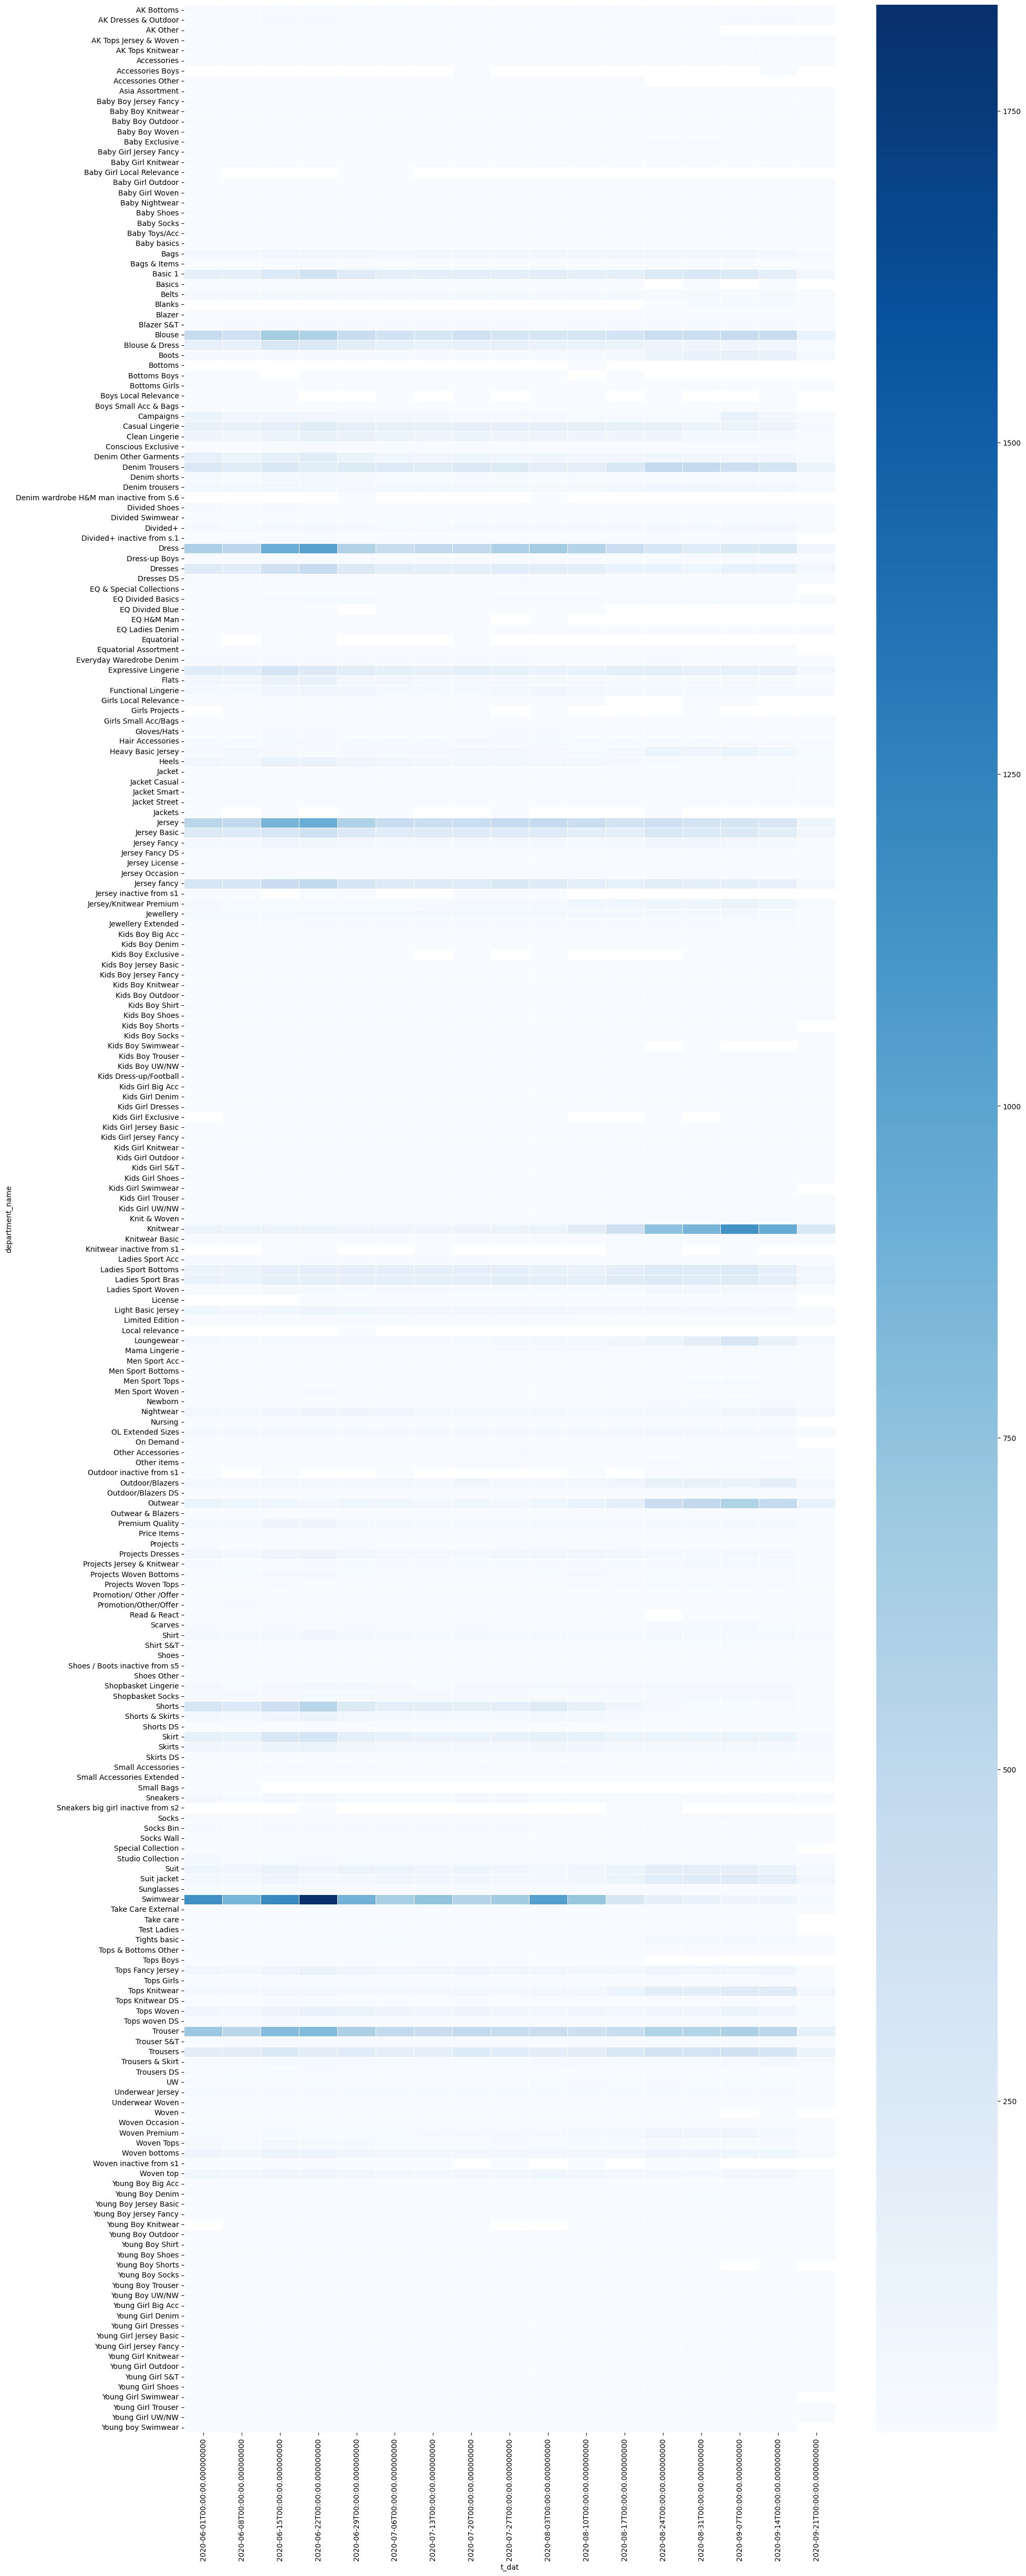

In [53]:
f, ax = plt.subplots(figsize=(20, 60))

sns.heatmap(TransactionsAndArticlesAndCustomersGroupedPivoted, annot=False,  linewidths=.5 ,cmap='Blues', fmt='g')